In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import model_from_json

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy

In [2]:
def MultiToy(X_train, y_train, **kwargs):
        
    model = Sequential([
        Conv2D(filters=8, kernel_size=(8,8), strides=(4,4), activation='relu', input_shape=(384, 512, 3)),
        MaxPooling2D(pool_size=(8,8)),
        Conv2D(filters=8, kernel_size=(8,8), strides=(4,4), activation='relu'),
        Dropout(0.1),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(3, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, **kwargs)
    return model, history

In [3]:
X, y = [], []
folder = 'new-house-resized-dataset'
folder_list = os.listdir(folder)
for file in folder_list:
    print('.',end='')
    category = file.split('_')[0]
    if category == 'recycle':
        y.append([1,0,0])
    elif category == 'trash':
        y.append([0,1,0])
    elif category == 'compost':
        y.append([0,0,1])
    else:
        raise Exception(f'Invalid Waste Catgory: {category}')
    img = Image.open(f'{folder}/{file}')
    arr = np.array(img)
    X.append(arr)

print()
print('Datapoints:', len(y))
X, y = np.array(X), np.array(y)
print('Recycle/Trash/Compost:', np.sum(y, axis=0))
print('done')

................................................................................................................................................................................................................................................................................................................................................................
Datapoints: 352
Recycle/Trash/Compost: [117 118 117]
done


In [4]:
SPLIT = 3
TEST_IDX = [271, 318, 309, 108, 110, 70, 256, 331, 111, 224, 3, 55, 114, 117, 164, 295, 254, 149, 221, 48, 192, 316, 195, 167, 307, 66, 165, 10, 152, 265, 338, 76, 99, 201, 151, 162, 311, 169, 253, 29, 322, 32, 61, 74, 52, 157, 91, 255, 187, 136, 314, 266, 325, 269, 332, 185, 9, 351, 250, 22, 347, 172, 260, 73, 321, 133, 299, 220, 18, 98]


def train_test_split(X, y, test_idx=None, test_size=0.2):
    ''' Split input data X and labels y into training and testing arrays '''
    n_list = list(range(len(y)))
    if test_idx is None:
        print('\n -- Performing NEW train-test split -- \n')
        test_idx = np.random.choice(n_list, replace=False, size=int(test_size*len(y)))
    else:
        test_idx = np.array(test_idx)
    train_idx = np.array([i for i in n_list if i not in test_idx])
    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx]
    y_test = y[test_idx]
    return X_train, y_train, X_test, y_test, test_idx

X_train, y_train, X_test, y_test, test_idx = train_test_split(X, y, TEST_IDX)
print(list(test_idx))

if not TEST_IDX:
    np.save(f'X_train_split{SPLIT}', X_train)
    np.save(f'y_train_split{SPLIT}', y_train)
    np.save(f'X_test_split{SPLIT}', X_test)
    np.save(f'y_test_split{SPLIT}', y_test)
    with open(f'test_idx_split{SPLIT}.txt', 'w') as f:
        f.write(str(list(test_idx)))

[271, 318, 309, 108, 110, 70, 256, 331, 111, 224, 3, 55, 114, 117, 164, 295, 254, 149, 221, 48, 192, 316, 195, 167, 307, 66, 165, 10, 152, 265, 338, 76, 99, 201, 151, 162, 311, 169, 253, 29, 322, 32, 61, 74, 52, 157, 91, 255, 187, 136, 314, 266, 325, 269, 332, 185, 9, 351, 250, 22, 347, 172, 260, 73, 321, 133, 299, 220, 18, 98]


In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(282, 384, 512, 3) (282, 3)
(70, 384, 512, 3) (70, 3)


In [6]:
#class_weight = {0:1, 1:100}
#print(class_weight)
model, hist = MultiToy(X_train, y_train, verbose=True, epochs=200, validation_split=0.2, shuffle=True)
    #, batch_size=32)
    # class_weight = class_weight)

Epoch 1/200
8/8 [==============================] - 1s 160ms/step - loss: 5.7874 - accuracy: 0.3333 - val_loss: 1.0217 - val_accuracy: 0.5439
Epoch 2/200
8/8 [==============================] - 1s 123ms/step - loss: 1.1442 - accuracy: 0.4489 - val_loss: 1.1806 - val_accuracy: 0.2456
Epoch 3/200
8/8 [==============================] - 1s 129ms/step - loss: 1.0320 - accuracy: 0.4889 - val_loss: 1.4062 - val_accuracy: 0.2105
Epoch 4/200
8/8 [==============================] - 1s 121ms/step - loss: 0.9725 - accuracy: 0.4844 - val_loss: 1.5603 - val_accuracy: 0.1579
Epoch 5/200
8/8 [==============================] - 1s 117ms/step - loss: 0.8845 - accuracy: 0.5333 - val_loss: 1.6758 - val_accuracy: 0.1930
Epoch 6/200
8/8 [==============================] - 1s 120ms/step - loss: 0.8303 - accuracy: 0.5289 - val_loss: 1.5720 - val_accuracy: 0.2456
Epoch 7/200
8/8 [==============================] - 1s 118ms/step - loss: 0.7470 - accuracy: 0.6400 - val_loss: 1.6372 - val_accuracy: 0.2807
Epoch 8/200
8

Epoch 59/200
8/8 [==============================] - 1s 120ms/step - loss: 0.0719 - accuracy: 0.9689 - val_loss: 0.6947 - val_accuracy: 0.8421
Epoch 60/200
8/8 [==============================] - 1s 131ms/step - loss: 0.1030 - accuracy: 0.9556 - val_loss: 0.6970 - val_accuracy: 0.8596
Epoch 61/200
8/8 [==============================] - 1s 121ms/step - loss: 0.1317 - accuracy: 0.9600 - val_loss: 0.4276 - val_accuracy: 0.8596
Epoch 62/200
8/8 [==============================] - 1s 121ms/step - loss: 0.3133 - accuracy: 0.8622 - val_loss: 0.3775 - val_accuracy: 0.8596
Epoch 63/200
8/8 [==============================] - 1s 117ms/step - loss: 0.4402 - accuracy: 0.7822 - val_loss: 0.6653 - val_accuracy: 0.8947
Epoch 64/200
8/8 [==============================] - 1s 119ms/step - loss: 0.3424 - accuracy: 0.8533 - val_loss: 0.3791 - val_accuracy: 0.9474
Epoch 65/200
8/8 [==============================] - 1s 124ms/step - loss: 0.3374 - accuracy: 0.8400 - val_loss: 0.6064 - val_accuracy: 0.8421
Epoch 

8/8 [==============================] - 1s 120ms/step - loss: 0.0403 - accuracy: 0.9822 - val_loss: 0.7956 - val_accuracy: 0.8421
Epoch 117/200
8/8 [==============================] - 1s 132ms/step - loss: 0.0440 - accuracy: 0.9867 - val_loss: 0.9086 - val_accuracy: 0.8596
Epoch 118/200
8/8 [==============================] - 1s 171ms/step - loss: 0.0183 - accuracy: 0.9956 - val_loss: 0.9976 - val_accuracy: 0.8596
Epoch 119/200
8/8 [==============================] - 1s 157ms/step - loss: 0.0188 - accuracy: 0.9956 - val_loss: 1.0646 - val_accuracy: 0.8596
Epoch 120/200
8/8 [==============================] - 1s 154ms/step - loss: 0.0275 - accuracy: 0.9867 - val_loss: 1.0515 - val_accuracy: 0.8596
Epoch 121/200
8/8 [==============================] - 1s 127ms/step - loss: 0.0277 - accuracy: 0.9867 - val_loss: 0.7827 - val_accuracy: 0.8596
Epoch 122/200
8/8 [==============================] - 1s 133ms/step - loss: 0.0167 - accuracy: 0.9911 - val_loss: 0.5842 - val_accuracy: 0.8772
Epoch 123/200

8/8 [==============================] - 2s 215ms/step - loss: 0.0397 - accuracy: 0.9867 - val_loss: 1.9139 - val_accuracy: 0.7544
Epoch 174/200
8/8 [==============================] - 2s 197ms/step - loss: 0.0622 - accuracy: 0.9822 - val_loss: 1.8207 - val_accuracy: 0.7544
Epoch 175/200
8/8 [==============================] - 2s 204ms/step - loss: 0.0401 - accuracy: 0.9867 - val_loss: 1.5685 - val_accuracy: 0.7895
Epoch 176/200
8/8 [==============================] - 2s 202ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 1.5087 - val_accuracy: 0.8421
Epoch 177/200
8/8 [==============================] - 2s 191ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 1.5916 - val_accuracy: 0.8421
Epoch 178/200
8/8 [==============================] - 2s 199ms/step - loss: 0.0172 - accuracy: 0.9956 - val_loss: 1.5996 - val_accuracy: 0.8246
Epoch 179/200
8/8 [==============================] - 1s 176ms/step - loss: 0.0302 - accuracy: 0.9822 - val_loss: 1.4299 - val_accuracy: 0.8421
Epoch 180/200

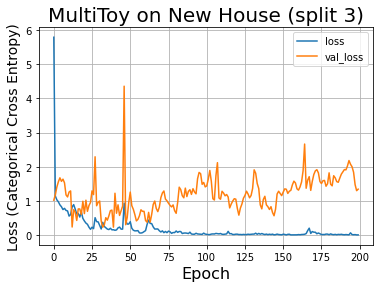

In [7]:
def plot_loss(hist):
    plt.figure()
    plt.plot(hist.history['loss'], label='loss')
    plt.plot(hist.history['val_loss'], label='val_loss')
    plt.title(f'MultiToy on New House (split {SPLIT})', size=20)
    plt.xlabel('Epoch', size=16)
    plt.ylabel('Loss (Categorical Cross Entropy)', size=14)
    plt.legend()
    plt.grid(True)
    
plot_loss(hist)

In [8]:
y_pred = model.predict(X_test)
# np.round(y_pred,3)

In [9]:
y_test_arg = np.argmax(y_test, axis=1)
y_pred_arg = np.argmax(y_pred, axis=1)
print('Recycle (0) vs. Trash (1) vs. Compost (2)\nCategorical Classifier trained on New House data')
print('\nConfusion matrix:\n', confusion_matrix(y_test_arg, y_pred_arg))
print('\nAccuracy:', accuracy(y_test_arg, y_pred_arg))

Recycle (0) vs. Trash (1) vs. Compost (2)
Categorical Classifier trained on New House data

Confusion matrix:
 [[16  1  4]
 [ 0 22  4]
 [ 0  4 19]]

Accuracy: 0.8142857142857143


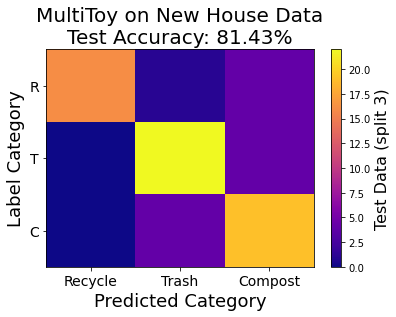

In [10]:
plt.pcolormesh(confusion_matrix(y_test_arg, y_pred_arg), cmap='plasma')
acc = np.round(accuracy(y_test_arg, y_pred_arg)*100, 2)
plt.title(f'MultiToy on New House Data\nTest Accuracy: {acc}%', size=20)
plt.xlabel('Predicted Category', size=18)
plt.ylabel('Label Category', size=18)
plt.xticks([0.5, 1.5, 2.5], ['Recycle', 'Trash', 'Compost'], size=14)
plt.yticks([0.5, 1.5, 2.5], ['R', 'T', 'C'], size=14)
plt.ylim(3,0)
plt.colorbar().set_label(label=f'Test Data (split {SPLIT})', size=16)

In [11]:
model_name = f'MultiToy_model_split{SPLIT}'
model_json = model.to_json()
with open(f'{model_name}.json', 'w') as jf:
    jf.write(model_json)
model.save_weights(f'{model_name}.h5')

In [12]:
# from tensorflow.keras.models import model_from_json
with open(f'{model_name}.json') as jf:
    json = jf.read()
loaded_model = model_from_json(json)
loaded_model.load_weights(f'{model_name}.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 95, 127, 8)        1544      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 15, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 2, 8)           4104      
_________________________________________________________________
dropout (Dropout)            (None, 1, 2, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               4352      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 7